# Introduction aux modèles de langue via Huggingface
---

### Librement adapté des supports de Rémy DECOUPES


![pipeline](ressources/mermaid_TP2_pipeline.png)


### 1. Tokenization

Le principe de séparer une phrase en de multiples éléments unitaires (lettre, mots, morceaux de mots, ...)

**ATTENTION** EN général, tous les composants suivants sont directement dépendant du *tokenizer*

In [1]:
texte = "Je suis Vincent, enseignant en IODAA à AgroParisTech"

Tokenization simple : détection d'espace entre les mots

In [2]:
tokens = texte.split(" ")
tokens

['Je', 'suis', 'Vincent,', 'enseignant', 'en', 'IODAA', 'à', 'AgroParisTech']

Tokenization "WordPiece"

In [3]:
from transformers import AutoTokenizer

tokenizer_bert = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
tokens_bert = tokenizer_bert.tokenize(texte)
tokens_bert

/Users/vguigue/opt/anaconda3/envs/torch2025/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['je',
 'sui',
 '##s',
 'vincent',
 ',',
 'en',
 '##sei',
 '##gnant',
 'en',
 'io',
 '##da',
 '##a',
 'a',
 'ag',
 '##rop',
 '##aris',
 '##tech']

In [4]:
# tenter de faire de la tokenization avec des textes anglais VS français: que constatez-vous?

# TODO

---
### 2. Encodage numérique des tokens

Conversion token -> ID

In [5]:
inputs = tokenizer_bert(texte, return_tensors="pt")
inputs

{'input_ids': tensor([[  101, 15333, 24086,  2015,  6320,  1010,  4372, 20240, 27881,  4372,
         22834,  2850,  2050,  1037, 12943, 18981, 23061, 15007,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

Bert a un vocabulaire de ~30k Tokens. Voyons comment il se comporte avec notre text en entrée

<img align="right" src="https://upload.wikimedia.org/wikipedia/commons/5/55/Question_Mark.svg">

**Questions** :

---
+ À quoi correspondent les "input_ids" ?
+ À quoi correspondent les "inputs.word_ids() ?

In [6]:
print(f"Inputs: {inputs} \n")
print(f"Inputs_ids: {inputs['input_ids']} \n")
print(f"Inputs word ids: {inputs.word_ids()} \n")
print(f"Inputs to words: {tokenizer_bert.tokenize(texte)} \n")

Inputs: {'input_ids': tensor([[  101, 15333, 24086,  2015,  6320,  1010,  4372, 20240, 27881,  4372,
         22834,  2850,  2050,  1037, 12943, 18981, 23061, 15007,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])} 

Inputs_ids: tensor([[  101, 15333, 24086,  2015,  6320,  1010,  4372, 20240, 27881,  4372,
         22834,  2850,  2050,  1037, 12943, 18981, 23061, 15007,   102]]) 

Inputs word ids: [None, 0, 1, 1, 2, 3, 4, 4, 4, 5, 6, 6, 6, 7, 8, 8, 8, 8, None] 

Inputs to words: ['je', 'sui', '##s', 'vincent', ',', 'en', '##sei', '##gnant', 'en', 'io', '##da', '##a', 'a', 'ag', '##rop', '##aris', '##tech'] 



<img align="right" src="https://upload.wikimedia.org/wikipedia/commons/5/55/Question_Mark.svg">

**Questions**:

---
+ Pourquoi la tokenization fait apparaître 2 tokens supplémentaires ?
+ À quoi correspondent-ils ?

In [7]:
print(f"Shape of inputs: {inputs['input_ids'].shape} | Number of words: {len(tokenizer_bert.tokenize(texte))} \n")
print(f"Token ID = 101: {tokenizer_bert.convert_ids_to_tokens(101)} \n")
print(f"Token ID = 102: {tokenizer_bert.convert_ids_to_tokens(102)} \n")

Shape of inputs: torch.Size([1, 19]) | Number of words: 17 

Token ID = 101: [CLS] 

Token ID = 102: [SEP] 



Representation vectorielle (embedding) vocabulaire fixe de BERT

In [8]:
from transformers import BertModel

model = BertModel.from_pretrained("bert-base-uncased")
embedding_matrix = model.embeddings.word_embeddings.weight

print(f"Matrice des embeddings de Bert: {embedding_matrix} \n\n Shape de cette matrice: {embedding_matrix.shape}")

Matrice des embeddings de Bert: Parameter containing:
tensor([[-0.0102, -0.0615, -0.0265,  ..., -0.0199, -0.0372, -0.0098],
        [-0.0117, -0.0600, -0.0323,  ..., -0.0168, -0.0401, -0.0107],
        [-0.0198, -0.0627, -0.0326,  ..., -0.0165, -0.0420, -0.0032],
        ...,
        [-0.0218, -0.0556, -0.0135,  ..., -0.0043, -0.0151, -0.0249],
        [-0.0462, -0.0565, -0.0019,  ...,  0.0157, -0.0139, -0.0095],
        [ 0.0015, -0.0821, -0.0160,  ..., -0.0081, -0.0475,  0.0753]],
       requires_grad=True) 

 Shape de cette matrice: torch.Size([30522, 768])


In [9]:
vocab = tokenizer_bert.get_vocab()
list(vocab)[5000:5020]

['and',
 'cautious',
 '##ai',
 '1871',
 'sequels',
 '[unused7]',
 'mi',
 'site',
 'densely',
 'apparatus',
 'brothers',
 'holiday',
 'authorship',
 'miners',
 'morale',
 'girlfriends',
 'hockey',
 'tomb',
 'musicians',
 'nhl']

In [10]:
print("paris" in list(vocab))
print("ouagadougou" in list(vocab))

True
False


In [11]:
for subtokens in tokenizer_bert("Ouagadougou")["input_ids"]:
    print(tokenizer_bert.convert_ids_to_tokens(subtokens))

[CLS]
ou
##aga
##dou
##go
##u
[SEP]


---

### 3. Modèle de langue
#### 3.1 Les Embeddings contextualisés

<img align="right" src="https://upload.wikimedia.org/wikipedia/commons/5/55/Question_Mark.svg">

Nous allons récupérer les représentations vectorielles des tokens de notre phrase

 `A INRAE, nous disposons de compétences variées : Traitement Automatique de la Langue, technologie du web sémantique, informatique, biostatistiques, sciences de la terre et du vivant, sciences humaines et sociales. Mais les méthodes d’analyse automatique de textes qui relèvent des modèles de langue, des graphes de connaissance et de l’extraction d’information restent encore peu partagées entre communautés`

**Questions**:

---
+ Qu'est-ce que représente le tensor "last_hidden_states" ?
+ Commenter sa dimension (torch.Size([1, 16, 768])
+ À quoi sert de moyenner les last_hidden_states ?

In [12]:
texte = "A INRAE, nous disposons de compétences variées : Traitement Automatique de la Langue, technologie du web sémantique, informatique, biostatistiques, sciences de la terre et du vivant, sciences humaines et sociales."

In [13]:
import torch

inputs = tokenizer_bert(texte, return_tensors="pt")

with torch.no_grad():
    last_hidden_states = model(inputs['input_ids'])[0]
last_hidden_states_mean = last_hidden_states.mean(1)
print(f"Dimension des représentations vectorielles: {last_hidden_states.shape}")
print(f"Les dimensions de la moyenne des représentation des tokens tokens: {last_hidden_states_mean.shape}")

Dimension des représentations vectorielles: torch.Size([1, 63, 768])
Les dimensions de la moyenne des représentation des tokens tokens: torch.Size([1, 768])


#### 3.2 Visualiser les embeddings

/Users/vguigue/opt/anaconda3/envs/torch2025/lib/python3.12/site-packages/threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/var/folders/_h/xz4nr0h53dj3x3tygxjnzl540000gn/T/ipykernel_13767/1931323146.py:14: UserWarning: No artists with label

0     None
1     None
2     None
3     None
4     None
      ... 
56    None
57    None
58    None
59    None
60    None
Length: 61, dtype: object

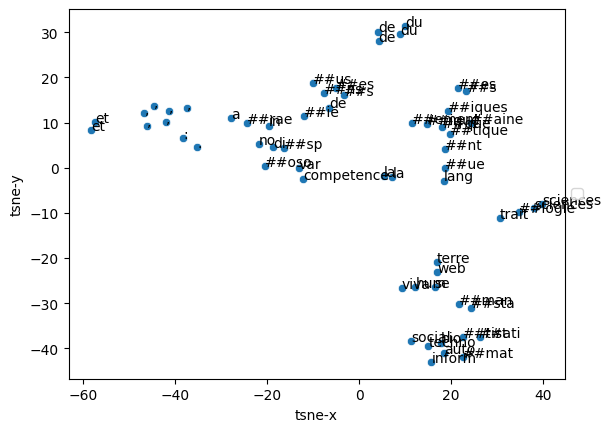

In [14]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

df = pd.DataFrame()

df["token"] = tokenizer_bert.tokenize(texte)
df["sentence"] = 1
results = TSNE(n_components=2, perplexity=4).fit_transform(last_hidden_states[0])
df["tsne-x"] = results[1:-1,0]
df["tsne-y"] = results[1:-1,1]

plot = sns.scatterplot(data=df, x="tsne-x", y="tsne-y")
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

def plotlabel(x, y, label):
    plot.text(x+0.002, y+0.002, label)

df.apply(lambda x: plotlabel(x['tsne-x'],  x['tsne-y'], x['token']), axis=1)

Sachant que la visualisation des embeddings est plus complète sous tensorboard...

=> Proposer le code permettant de visualiser ces embeddings à l'aide de l'interface tensorboard

1. Ouverture d'un tensorboard + SummaryWriter
2. Ecriture des embeddings
3. Visualisation

Note: utilisez un chatbot si vous ne vous rappelez plus certaines étapes.

In [ ]:
# TODO



#### 3.3 Mesure les distances entre embeddings de mots

**Similarité cosinus** ou **cosine similarity**


Pour mesurer la proximité sémantique entre des tokens ou des phrases, nous utilisons une mesure de distance entre vecteurs : cosine similarity

En géométrie, on utilise le produit scalaire pour comparer deux vecteurs :

**A⋅B=∥A∥×∥B∥×cos(θ)**

Quand on compare les embeddings de deux phrases, la norme des vecteurs (i.e. ||A||) n'est pas utilisée. On ne se focalise que sur l'angle entre les vecteurs.
En effet, il est peu pertinent de comparer des normes (c'est à dire longueur de phrase).

- Si les vecteurs sont orthogonaux, cos(90°) = 0 => Les phrases ont des sens complétement différents
- Si les vecteurs sont dans la même direction, cos(0°) = 1 => Les phrases partagent le même sens

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

def bert_word_embedding(input_text):
    input_ids = tokenizer_bert.encode(input_text, add_special_tokens=True)
    # input_ids: [101, 2182, 2003, 2070, 3793, 2000, 4372, 16044, 102]
    input_ids = torch.tensor([input_ids])

    with torch.no_grad():
        last_hidden_states = model(input_ids)[0] # Models outputs are now tuples
    # last_hidden_states = last_hidden_states.mean(1)
    return last_hidden_states[:,1,:] # return embedding of the word

def cosine_similarity_word_pairwise(token1, token2):
    embedding = bert_word_embedding(token1)
    embedding2 = bert_word_embedding(token2)
    return cosine_similarity(embedding, embedding2)

In [ ]:
print(f"Similarité entre 'NLP' et 'biology': {cosine_similarity_word_pairwise('NLP', 'biology')}")
print(f"Similarité entre 'CNRS' et 'INRAE': {cosine_similarity_word_pairwise('CNRS', 'INRAE')}")

# Ajouter quelques tests

Proximité entre 'NLP' et 'biology': [[0.1786783]]
Proximité entre 'CNRS' et 'INRAE': [[0.33785474]]


Vous noterez qu'il est possible d'interroger les modèles de langue dans le cadre de certaines applications sans avoir à pratiquer aucun entrainement et avec un nombre de ligne de codes particulièrement limitées

#### 3.4 Architecture du modèle

In [17]:
from bertviz import model_view

texte = "A INRAE, nous disposons de compétences variées"

model_attention = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)

inputs = tokenizer_bert.encode(texte, return_tensors='pt') 
outputs = model_attention(inputs)
attention = outputs[-1]
tokens = tokenizer_bert.convert_ids_to_tokens(inputs[0])
model_view(attention, tokens)

ModuleNotFoundError: No module named 'bertviz'

---

### 4. Classification : tête de tâche

In [18]:
print(model)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [19]:
from transformers import BertForTokenClassification

model_ner = BertForTokenClassification.from_pretrained('bert-base-uncased')

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
print(model_ner)

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

<img align="right" src="https://upload.wikimedia.org/wikipedia/commons/5/55/Question_Mark.svg">

**Questions** :

---
- Pourquoi la dernière couche, **classifier**, n'a que 2 features en sortie ?

In [22]:

inputs = tokenizer_bert.encode(texte, return_tensors='pt') 
outputs = model_ner(inputs)
outputs.logits

tensor([[[-0.0091, -0.0273],
         [-0.2223,  0.2818],
         [-0.0341,  0.1580],
         [-0.2838,  0.0343],
         [ 0.1874, -0.1079],
         [-0.4561,  0.4653],
         [ 0.4331,  0.2028],
         [-0.2653,  0.1930],
         [ 0.1636,  0.0041],
         [-0.0201, -0.1343],
         [ 0.3080,  0.0335],
         [-0.0152,  0.2586],
         [ 0.4424,  0.3040],
         [ 0.3137,  0.1561],
         [ 0.0200,  0.2112],
         [-0.0556, -0.0961],
         [ 0.1910, -0.0082],
         [-0.0663, -0.0292],
         [-0.2884,  0.0027],
         [-0.0609, -0.0585],
         [ 0.1115, -0.2406],
         [ 0.0936, -0.1861],
         [-0.1188,  0.1409],
         [-0.0506,  0.1698],
         [-0.2582,  0.0641],
         [-0.2721,  0.2373],
         [-0.2719, -0.3126],
         [ 0.3263, -0.3135],
         [ 0.4005,  0.0508],
         [ 0.0436,  0.1135],
         [-0.3445,  0.0721],
         [-0.0006, -0.1506],
         [-0.2165, -0.1101],
         [ 0.1860, -0.2615],
         [-0.1

In [23]:
torch.argmax(outputs.logits, dim=-1)

tensor([[0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
         1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
         0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1]])

### 5. Post traitement

#### 5.1 Les labels

Chargeons un autre modèle NER (en Français) : **[Camembert-NER](https://huggingface.co/Jean-Baptiste/camembert-ner)**

Abbreviation|Description
-|-
O |Outside of a named entity
MISC |Miscellaneous entity
PER |Person’s name
ORG |Organization
LOC |Location

In [24]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer_camembert_ner = AutoTokenizer.from_pretrained("Jean-Baptiste/camembert-ner")
model_camembert_ner = AutoModelForTokenClassification.from_pretrained("Jean-Baptiste/camembert-ner")
print(model_camembert_ner.config.id2label)


{0: 'O', 1: 'I-LOC', 2: 'I-PER', 3: 'I-MISC', 4: 'I-ORG'}


In [25]:
inputs = tokenizer_camembert_ner(texte, return_tensors="pt")
outputs = model_camembert_ner(**inputs)
torch.argmax(outputs.logits, dim=-1)

tensor([[0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [26]:
label_list = ["O", "LOC", "PER", "MISC", "ORG"]


predicted_labels = [label_list[p.item()] for p in torch.argmax(outputs.logits, dim=-1)[0]]

tokens = tokenizer_camembert_ner.convert_ids_to_tokens(inputs["input_ids"][0])
for token, label in zip(tokens, predicted_labels):
    print(f"{token:10s} -> {label}")

<s>        -> O
▁A         -> O
▁IN        -> ORG
RA         -> ORG
E          -> ORG
,          -> O
▁nous      -> O
▁disposons -> O
▁de        -> O
▁compétences -> O
▁variées   -> O
▁:         -> O
▁Traitement -> MISC
▁Automatique -> MISC
▁de        -> MISC
▁la        -> MISC
▁Langue    -> MISC
,          -> O
▁technologie -> O
▁du        -> O
▁web       -> O
▁sémantique -> O
,          -> O
▁informatique -> O
,          -> O
▁bio       -> O
stat       -> O
istique    -> O
s          -> O
,          -> O
▁sciences  -> O
▁de        -> O
▁la        -> O
▁terre     -> O
▁et        -> O
▁du        -> O
▁vivant    -> O
,          -> O
▁sciences  -> O
▁humaines  -> O
▁et        -> O
▁sociales  -> O
.          -> O
</s>       -> O


#### 5.2 Score de la classification

Pour cela, nous allons utiliser la fonction **pipeline** de transformers (beaucoup plus simple à manipuler)

In [27]:
from transformers import pipeline
nlp = pipeline('ner', model=model_camembert_ner, tokenizer=tokenizer_camembert_ner, aggregation_strategy="simple")
nlp(texte)

Device set to use mps:0


[{'entity_group': 'ORG',
  'score': 0.69282097,
  'word': 'INRAE',
  'start': 1,
  'end': 7},
 {'entity_group': 'MISC',
  'score': 0.97698784,
  'word': 'Traitement Automatique de la Langue',
  'start': 48,
  'end': 84}]

Bert a un vocabulaire de ~30k Tokens. Voyons comment il se comporte avec notre text en entré

<img align="right" src="https://upload.wikimedia.org/wikipedia/commons/5/55/Question_Mark.svg">

**Questions** :

---
- Comment interprétez-vous le score de 0.7425 ?


## 6. Classification de textes

Changer la couche de classification de tokens pour une classification de textes.
Pour cela, rendez-vous sur le site d'HuggingFace et choisissez un nouveau modèle.

- Donner son modèle de base
- Son tokenizer
- Ses labels 